In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [6]:
!git clone https://github.com/RAlfin25/Capstone-BANGKIT-ML-Path.git
%ls

Cloning into 'Capstone-BANGKIT-ML-Path'...
remote: Enumerating objects: 30075, done.
remote: Counting objects: 100% (9028/9028), done.
remote: Compressing objects: 100% (8984/8984), done.
remote: Total 30075 (delta 42), reused 9023 (delta 41), pack-reused 21047
Receiving objects: 100% (30075/30075), 1.60 GiB | 25.19 MiB/s, done.
Resolving deltas: 100% (78/78), done.
Updating files: 100% (34326/34326), done.
Capstone-BANGKIT-ML-Path/  sample_data/


In [28]:
# Read image folders (train, test, validation)
train_path = "/content/Capstone-BANGKIT-ML-Path/Vegetable Images/train"
test_path = "/content/Capstone-BANGKIT-ML-Path/Vegetable Images/test"
validation_path = "/content/Capstone-BANGKIT-ML-Path/Vegetable Images/validation"

In [29]:
image_classes = os.listdir("/content/Capstone-BANGKIT-ML-Path/Vegetable Images/test")
image_classes

['Cauliflower',
 'Pumpkin',
 'Cabbage',
 'Capsicum',
 'Bean',
 'Broccoli',
 'Radish',
 'Bitter_Gourd',
 'Cucumber',
 'Brinjal',
 'Carrot',
 'Bottle_Gourd',
 'Tomato',
 'Potato',
 'Papaya']

In [30]:
def plot_images(image_classes):
    plt.figure(figsize = (14, 14))

    for i, category in enumerate(image_classes):
        image_path = train_path + "/" + category
        image_in_folder = os.listdir(image_path)

        first_image = image_in_folder[0]
        first_image_path = image_path + "/" + first_image

        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255

        plt.subplot(4,4, i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis("off")
    plt.show()

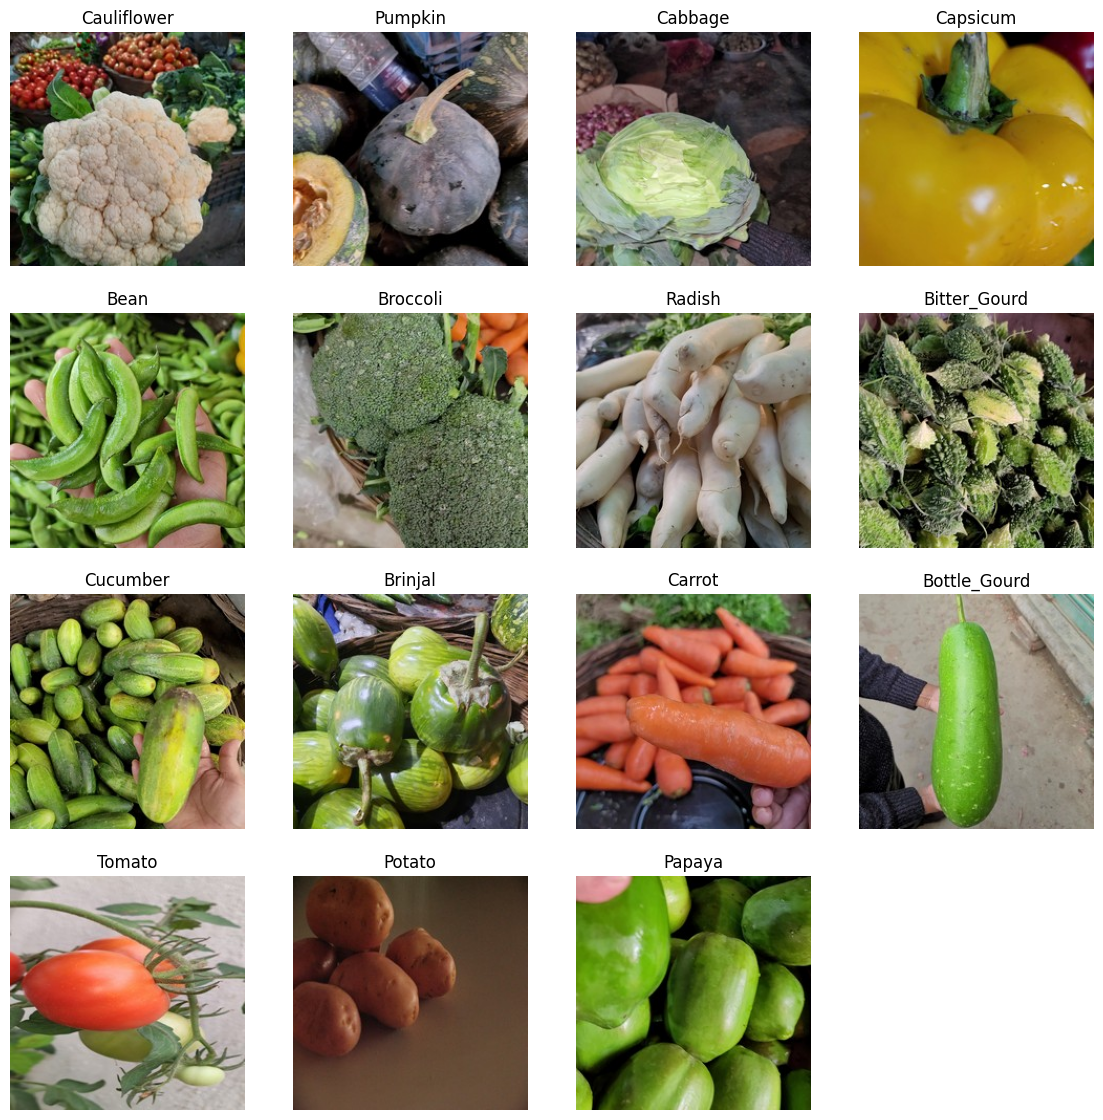

In [31]:
plot_images(image_classes)

In [32]:
image_generator = ImageDataGenerator(rescale = 1/255)

In [33]:
train_data = image_generator.flow_from_directory(train_path,
                                                target_size = (150, 150),
                                                batch_size = 32,
                                                class_mode = "categorical")

Found 15000 images belonging to 15 classes.


In [34]:
test_data = image_generator.flow_from_directory(test_path,
                                                target_size = (150, 150),
                                                batch_size = 32,
                                                class_mode = "categorical")

Found 3000 images belonging to 15 classes.


In [35]:
validation_data = image_generator.flow_from_directory(validation_path,
                                                target_size = (150, 150),
                                                batch_size = 32,
                                                class_mode = "categorical")

Found 3000 images belonging to 15 classes.


In [36]:
model = Sequential()

In [37]:
## Add layers to cnn model

# INPUT AND HIDDEN LAYERS

# Convolutional Layer
model.add(Conv2D(filters = 32,
                 kernel_size = 3,
                 padding = "same",
                 activation = "relu",
                 input_shape = [150, 150, 3])
         )

# Pooling Layer
model.add(MaxPooling2D(pool_size = (2,2)))

# Convolutional Layer
model.add(Conv2D(filters = 64,
                 kernel_size = 3,
                 padding = "same",
                 activation = "relu",)
         )

# Pooling Layer
model.add(MaxPooling2D())

# CLASSIFICATION

# Flatten Layer
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation = "relu"))

# Output Layer
model.add(Dense(15, activation = "softmax"))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [39]:
model.compile(optimizer = "adam",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [40]:
model_history = model.fit(train_data,
                         epochs = 5,
                         validation_data = validation_data)

Epoch 1/5
469/469 [==============================] - 720s 2s/step - loss: 1.0313 - accuracy: 0.6759 - val_loss: 0.4179 - val_accuracy: 0.8700
Epoch 2/5
469/469 [==============================] - 712s 2s/step - loss: 0.2603 - accuracy: 0.9225 - val_loss: 0.3542 - val_accuracy: 0.8910
Epoch 3/5
469/469 [==============================] - 728s 2s/step - loss: 0.0958 - accuracy: 0.9736 - val_loss: 0.3394 - val_accuracy: 0.8970
Epoch 4/5
469/469 [==============================] - 718s 2s/step - loss: 0.0477 - accuracy: 0.9856 - val_loss: 0.3285 - val_accuracy: 0.9237
Epoch 5/5
469/469 [==============================] - 705s 2s/step - loss: 0.0485 - accuracy: 0.9849 - val_loss: 0.4160 - val_accuracy: 0.8947


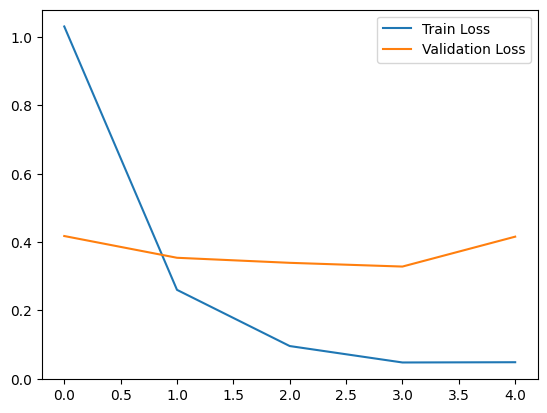

In [41]:
plt.plot(model_history.history["loss"], label = "Train Loss")
plt.plot(model_history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

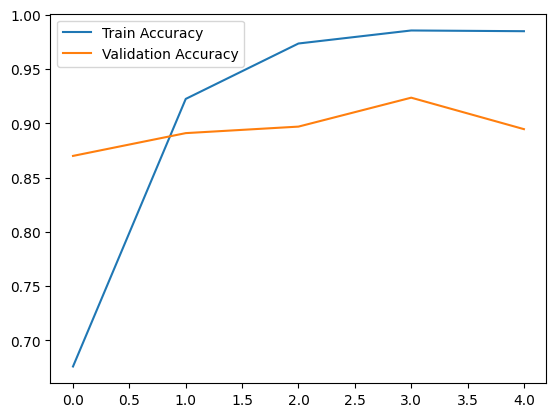

In [42]:
plt.plot(model_history.history["accuracy"], label = "Train Accuracy")
plt.plot(model_history.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

In [43]:
model.evaluate(test_data)

94/94 [==============================] - 45s 481ms/step - loss: 0.3687 - accuracy: 0.9040


[0.3686739206314087, 0.9039999842643738]

In [44]:
model.evaluate(train_data)

469/469 [==============================] - 196s 417ms/step - loss: 0.0646 - accuracy: 0.9779


[0.064642034471035, 0.9779333472251892]

In [45]:
# Save the CNN Model
model.save("Vegetables_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [49]:
from google.colab import files

# Download model
files.download("Vegetables_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>